In [63]:
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns 

In [64]:
auto=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/imports-85.data")

In [65]:
auto.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [66]:
auto=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/imports-85.data",names=["symboling","normalizedlosses","make","fueltype","aspiration","numofdoors","bodystyle","drivewheels","engine-location","wheelbase","length","width","height","curbweight","enginetype","numofcylinders","enginesize","fuelsystem","bore","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"],na_values="?")

In [67]:
auto

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,engine-location,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [68]:
auto.isnull()

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,engine-location,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
auto.isnull().sum()

symboling            0
normalizedlosses    41
make                 0
fueltype             0
aspiration           0
numofdoors           2
bodystyle            0
drivewheels          0
engine-location      0
wheelbase            0
length               0
width                0
height               0
curbweight           0
enginetype           0
numofcylinders       0
enginesize           0
fuelsystem           0
bore                 4
stroke               4
compressionratio     0
horsepower           2
peakrpm              2
citympg              0
highwaympg           0
price                4
dtype: int64

In [70]:
auto.normalizedlosses.unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [71]:
auto.normalizedlosses.fillna(auto.normalizedlosses.median(),inplace=True)
auto.numofdoors.fillna(auto.numofdoors.mode(),inplace=True)
auto.bore.fillna(auto.bore.mean(),inplace=True)
auto.stroke.fillna(auto.stroke.median(),inplace=True)
auto.horsepower.fillna(auto.horsepower.median(),inplace=True)
auto.peakrpm.fillna(auto.peakrpm.median(),inplace=True)
auto.price.fillna(auto.price.median(),inplace=True)

In [72]:
auto.normalizedlosses.unique()

array([115., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
        93., 142., 161., 153., 125., 128., 122., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [73]:
auto.numofdoors.unique()

array(['two', 'four', nan], dtype=object)

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

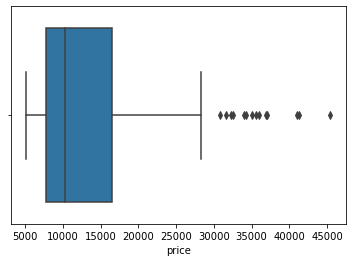

In [74]:
sns.boxplot(auto.price)

In [75]:
auto.bore.unique()

array([3.47      , 2.68      , 3.19      , 3.13      , 3.5       ,
       3.31      , 3.62      , 2.91      , 3.03      , 2.97      ,
       3.34      , 3.6       , 2.92      , 3.15      , 3.43      ,
       3.63      , 3.54      , 3.08      , 3.32975124, 3.39      ,
       3.76      , 3.58      , 3.46      , 3.8       , 3.78      ,
       3.17      , 3.35      , 3.59      , 2.99      , 3.33      ,
       3.7       , 3.61      , 3.94      , 3.74      , 2.54      ,
       3.05      , 3.27      , 3.24      , 3.01      ])

In [76]:
auto.stroke.unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.29, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64, 3.08,
       3.5 , 3.54, 2.87])

In [77]:
auto.horsepower.unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,  85.,
       114., 162., 134., 106.])

In [78]:
auto.peakrpm.unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
       5250., 4900., 4400., 6600., 5300.])

In [79]:
auto.price.unique()

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
       10295., 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 12945., 10345.,
        6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,  6795.,
        6695.,  7395., 10945., 11845., 13645., 15645.,  8495., 10595.,
       10245., 10795., 11245., 18280., 18344., 25552., 28248., 28176.,
       31600., 34184., 35056., 40960., 45400., 16503.,  5389.,  6189.,
        6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,  6989.,
        8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,  7299.,
        7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499., 14399.,
       17199., 19699., 18399., 11900., 13200., 12440., 13860., 15580.,
       16900., 16695., 17075., 16630., 17950., 18150., 12764., 22018.,
      

In [80]:
auto.numofdoors.fillna(auto.numofdoors.mode().max(),inplace=True)
print(auto.numofdoors.mode().max())

four


<AxesSubplot:xlabel='numofdoors', ylabel='count'>

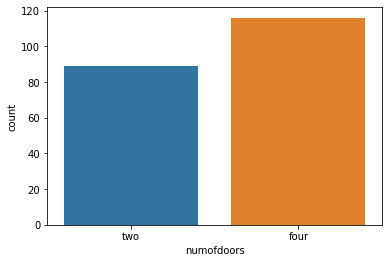

In [81]:
sns.countplot(x=auto.numofdoors,data=auto)

In [82]:
auto.isnull().sum()

symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
numofdoors          0
bodystyle           0
drivewheels         0
engine-location     0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
numofcylinders      0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [83]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   normalizedlosses  205 non-null    float64
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numofdoors        205 non-null    object 
 6   bodystyle         205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   engine-location   205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  numofcylinders    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [84]:
auto.drop(["make","fueltype","aspiration","numofdoors","bodystyle","drivewheels","engine-location","enginetype","numofcylinders","fuelsystem","symboling","normalizedlosses","wheelbase","length","width","height",],axis=1,inplace=True)

In [85]:
auto.citympg=(auto.citympg/1.0)
auto.curbweight=(auto.curbweight/1.0)
auto.enginesize=(auto.enginesize/1.0)
auto.highwaympg=auto.highwaympg/1.0


In [86]:
auto.head()

,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [87]:
auto.shape

(205, 10)

In [88]:
pearsonr(auto.horsepower,auto.citympg)

(-0.8021695239616373, 2.3946496094493493e-47)

In [89]:
trained=auto.iloc[:164]
test=auto.iloc[164:]


In [90]:
trained_horsepower

,const,horsepower
0,1.0,111.0
1,1.0,111.0
2,1.0,154.0
3,1.0,102.0
4,1.0,115.0
...,...,...
159,1.0,56.0
160,1.0,70.0
161,1.0,70.0
162,1.0,70.0


In [91]:

trained_curbweight=sm.add_constant(trained.curbweight)
trained_horsepower=sm.add_constant(trained.horsepower)
trained_peakrpm=sm.add_constant(trained.peakrpm)
trained_stroke=sm.add_constant(trained.stroke)

trained_curbweight

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,curbweight
0,1.0,2548.0
1,1.0,2548.0
2,1.0,2823.0
3,1.0,2337.0
4,1.0,2824.0
...,...,...
159,1.0,2275.0
160,1.0,2094.0
161,1.0,2122.0
162,1.0,2140.0


In [92]:
trained_y=trained.citympg
trained_y

0      21.0
1      21.0
2      19.0
3      24.0
4      18.0
       ... 
159    38.0
160    38.0
161    28.0
162    28.0
163    29.0
Name: citympg, Length: 164, dtype: float64

In [93]:
test_curbweight=sm.add_constant(test.curbweight)
test_horsepower=sm.add_constant(test.horsepower)
test_peakrpm=sm.add_constant(test.peakrpm)
test_stroke=sm.add_constant(test.stroke)

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [94]:
test_y=test.citympg
test_y

164    29.0
165    26.0
166    26.0
167    24.0
168    24.0
169    24.0
170    24.0
171    24.0
172    24.0
173    29.0
174    30.0
175    27.0
176    27.0
177    27.0
178    20.0
179    19.0
180    20.0
181    19.0
182    37.0
183    27.0
184    37.0
185    27.0
186    27.0
187    37.0
188    26.0
189    24.0
190    24.0
191    19.0
192    33.0
193    25.0
194    23.0
195    23.0
196    24.0
197    24.0
198    17.0
199    17.0
200    23.0
201    19.0
202    18.0
203    26.0
204    19.0
Name: citympg, dtype: float64

In [95]:
trained_horsepower.shape

(164, 2)

In [96]:
trained_y

0      21.0
1      21.0
2      19.0
3      24.0
4      18.0
       ... 
159    38.0
160    38.0
161    28.0
162    28.0
163    29.0
Name: citympg, Length: 164, dtype: float64

In [97]:
trained_horsepower

,const,horsepower
0,1.0,111.0
1,1.0,111.0
2,1.0,154.0
3,1.0,102.0
4,1.0,115.0
...,...,...
159,1.0,56.0
160,1.0,70.0
161,1.0,70.0
162,1.0,70.0


In [98]:
modelhp=sm.OLS(trained_y,trained_horsepower).fit()



In [99]:
modelhp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     271.0
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           2.06e-36
Time:                        10:19:56   Log-Likelihood:                -467.88
No. Observations:                 164   AIC:                             939.8
Df Residuals:                     162   BIC:                             946.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8040      0.883     43.923      0.000      37.059      40.549
horsepower    -0.1309      0.008    -16.462      0.000      -0.147      -0.115
==============================================================================
Omnibus:                       49.724   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.848
Skew:                           1.277   Prob(JB):                     2.11e-27
Kurtosis:                       6.385   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
predvalhp=modelhp.predict(trained_horsepower)


<AxesSubplot:xlabel='horsepower', ylabel='citympg'>

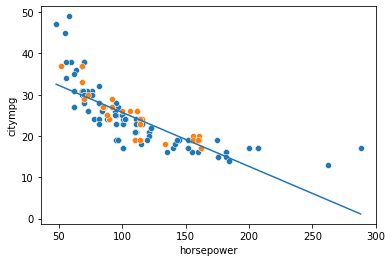

In [101]:
sns.scatterplot(x=trained_horsepower.horsepower,y=trained_y)
sns.scatterplot(x=test_horsepower.horsepower,y=test_y)
sns.lineplot(x=trained_horsepower.horsepower,y=predvalhp)

In [105]:
q1=auto.stroke.quantile(0.25)
q3=auto.stroke.quantile(0.75)
iqr=q3-q1
iqr

0.30000000000000027

In [108]:
ue=q3+1.5 * iqr
le=q3-1.5 * iqr

In [114]:
'ue = ', ue,'le = ', le


('ue = ', 3.8600000000000003, 'le = ', 2.96)

In [118]:
# droping
auto[(auto.stroke<ue)&(auto.stroke>le) ]

,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
2,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,2844.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
...,...,...,...,...,...,...,...,...,...,...
199,3157.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0,18950.0
200,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
203,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [123]:
# caping
auto.stroke[auto.stroke>ue]=ue
auto.stroke[auto.stroke<le]=le


In [117]:
for i in auto.stroke:
    if i > ue:
        print(i)

3.9
4.17
4.17
3.9
3.9


In [122]:
auto.stroke.unique().max()

3.8600000000000003

In [124]:
auto.stroke.unique().min()

2.96

In [125]:
auto[auto.stroke>ue]=ue

In [126]:
auto.stroke.unique().max()

3.8600000000000003